In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customers = pd.read_csv("olist_customers.csv")
geolocation = pd.read_csv('olist_geolocation.csv')
order_items = pd.read_csv('olist_order_items.csv')
payments = pd.read_csv('olist_payments.csv')
orders = pd.read_csv('olist_orders.csv')
products = pd.read_csv('olist_products.csv')

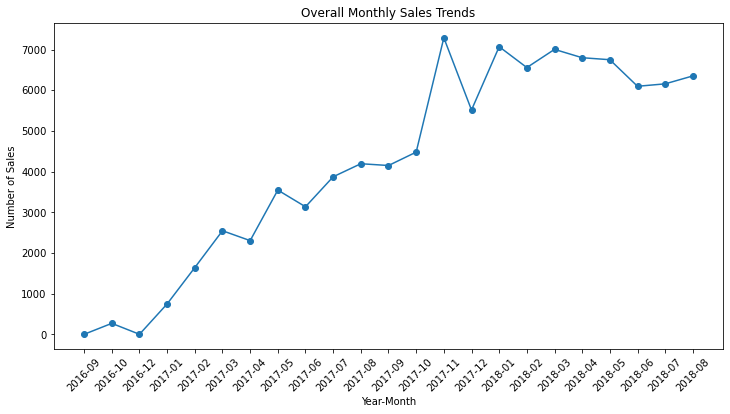

In [2]:
# Convert 'order_purchase_timestamp' to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Extract year and month from the order date
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Group by year and month and extract monthly sales data
monthly_sales = orders.groupby('year_month').size()

# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Number of Sales')
plt.title('Overall Monthly Sales Trends')

# Display the plot
plt.xticks(rotation=45)
plt.show()

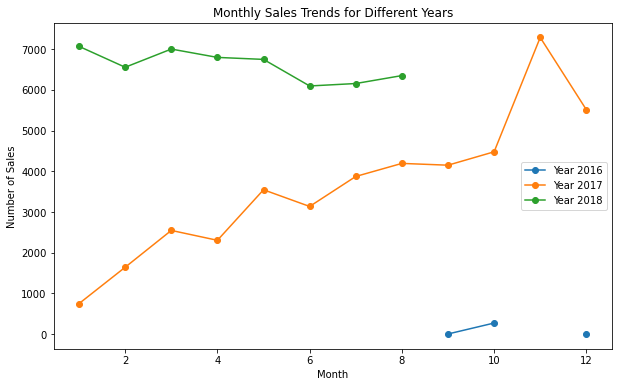

In [3]:
# Extract year from the order date
orders['order_year'] = orders['order_purchase_timestamp'].dt.year

# Extract month from the order date
orders['order_month'] = orders['order_purchase_timestamp'].dt.month

# Group by year and month and extract monthly sales data
monthly_sales_by_year = orders.groupby(['order_year', 'order_month']).size().unstack()

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Plot each year separately
for year in monthly_sales_by_year.index:
    plt.plot(monthly_sales_by_year.columns, monthly_sales_by_year.loc[year], marker='o', linestyle='-', label=f'Year {year}')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Monthly Sales Trends for Different Years')

# Adding legend
plt.legend()

# Display the plot
plt.show()